# LIBRARIES

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Face Recognition Using K-NN 

In [9]:
df = pd.read_csv(r"dataset.csv", header = None)

In [10]:
df = df.reset_index(drop=True)
df.columns = [f'feature{i}' for i in range(1, len(df.columns) + 1)]
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1015,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024
0,35,45,45,48,50,52,54,60,61,65,...,7,6,7,6,6,8,8,9,9,9
1,13,12,11,13,11,12,11,12,16,22,...,47,68,74,64,71,72,72,67,62,58
2,12,15,20,24,27,30,42,48,49,57,...,6,6,12,17,15,10,9,9,8,7
3,9,8,7,7,8,9,15,19,29,34,...,123,54,10,10,10,7,6,7,7,18
4,114,112,112,112,112,108,116,118,118,115,...,65,62,59,53,49,44,37,36,37,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,27,27,27,30,29,30,30,28,30,37,...,8,5,6,5,6,6,6,6,6,6
1696,25,26,26,29,30,29,30,32,35,43,...,11,6,6,6,6,6,6,6,6,7
1697,9,8,6,7,6,8,8,10,10,13,...,170,19,24,27,25,23,15,14,23,30
1698,9,7,6,6,8,8,9,11,14,20,...,235,145,39,34,29,24,13,25,21,26


Assigning the first 170 rows to the 1st individual, then next 170 rows to the 2nd individual and so on.

In [11]:
# Assign labels based on grouping
labels = []
current_label = 1
for index, row in df.iterrows():
    labels.append(current_label)
    if (index + 1) % 170 == 0:
        current_label += 1

# Add labels to the dataframe
df['label'] = labels

In [12]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024,label
0,35,45,45,48,50,52,54,60,61,65,...,6,7,6,6,8,8,9,9,9,1
1,13,12,11,13,11,12,11,12,16,22,...,68,74,64,71,72,72,67,62,58,1
2,12,15,20,24,27,30,42,48,49,57,...,6,12,17,15,10,9,9,8,7,1
3,9,8,7,7,8,9,15,19,29,34,...,54,10,10,10,7,6,7,7,18,1
4,114,112,112,112,112,108,116,118,118,115,...,62,59,53,49,44,37,36,37,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,27,27,27,30,29,30,30,28,30,37,...,5,6,5,6,6,6,6,6,6,10
1696,25,26,26,29,30,29,30,32,35,43,...,6,6,6,6,6,6,6,6,7,10
1697,9,8,6,7,6,8,8,10,10,13,...,19,24,27,25,23,15,14,23,30,10
1698,9,7,6,6,8,8,9,11,14,20,...,145,39,34,29,24,13,25,21,26,10


In [13]:
# Extracting features and labels 
X = df.drop(columns=['label'])
y = df['label']

# Convert dataframe to numpy array
data = X.values
labels = y.values

In [14]:
data

array([[35, 45, 45, ...,  9,  9,  9],
       [13, 12, 11, ..., 67, 62, 58],
       [12, 15, 20, ...,  9,  8,  7],
       ...,
       [ 9,  8,  6, ..., 14, 23, 30],
       [ 9,  7,  6, ..., 25, 21, 26],
       [18, 15, 13, ..., 20, 26, 17]], dtype=int64)

In [15]:
labels

array([ 1,  1,  1, ..., 10, 10, 10], dtype=int64)

# TASK 1 : Pre-process the dataset by normalizing each face image vector to unit length

In [16]:
def normalize_data(data):
    
    norm_data = np.zeros_like(data, dtype=float) 
    
    for i, row in enumerate(data):
        magnitude = np.sqrt(np.sum(row ** 2))  # Calculate the magnitude of the current row vector
        norm_data[i] = row / magnitude  # Normalize the row vector by dividing by its magnitude
        
    return norm_data

In [17]:
# Normalize the data
data_normalized = normalize_data(data)

In [18]:
data_normalized

array([[0.0217957 , 0.02802305, 0.02802305, ..., 0.00560461, 0.00560461,
        0.00560461],
       [0.00623682, 0.00575707, 0.00527731, ..., 0.03214361, 0.02974484,
        0.02782582],
       [0.0070847 , 0.00885587, 0.01180783, ..., 0.00531352, 0.00472313,
        0.00413274],
       ...,
       [0.00772975, 0.00687089, 0.00515317, ..., 0.01202406, 0.01975382,
        0.02576585],
       [0.00811554, 0.00631209, 0.00541036, ..., 0.02254317, 0.01893626,
        0.0234449 ],
       [0.01565356, 0.01304464, 0.01130535, ..., 0.01739285, 0.0226107 ,
        0.01478392]])

In [21]:
# Split data into train and test sets for each subject

X_train, X_test , y_train , y_test = [], [], [], []

for i in range(10):
    individual_data = data_normalized[i*170:(i+1)*170]
    train, test = train_test_split(individual_data, test_size = 20)
    X_train.extend(train)
    X_test.extend(test)
    y_train.extend([i] * len(train))
    y_test.extend([i] * len(test))

# TASK 2 : Implement a k Nearest Neighbors (k-NN) classifier from scratch

In [30]:
# Task 2a : Implementing a k Nearest Neighbors (k-NN) classifier from scratch

# Euclidean distance calculation
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Cosine similarity calculation
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# k-Nearest Neighbors classifier
def kNN(X_train, y_train, X_test, k, distance_metric):
    
    predictions = []
    
    for test_x in X_test:
        
        # Calculate distances between the test instance and all train instances
        distances = []
        for i, train_x in enumerate(X_train):
            distance = distance_metric(test_x, train_x)
            distances.append((i, distance))
        
        # Sort distances by distance value
        distances.sort(key = lambda x: x[1])
        
        # Select the top k neighbors
        neighbors = distances[:k]
        
        # Extract labels of the k nearest neighbors
        neighbor_labels = []
        for i, _ in neighbors:
            neighbor_labels.append(y_train[i])
        
        # Predict the label based on majority vote
        prediction = max(set(neighbor_labels), key = neighbor_labels.count)
        
        # Append prediction to the list of predictions
        predictions.append(prediction)
        
    return predictions

# Evaluate k-NN classifier
def evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric):
    predictions = kNN(X_train, y_train, X_test, k, distance_metric)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [34]:
# Task 2b: Implementing k-NN Classifier with fewer training and test images per subject

# Split data into train and test sets for each subject with fewer images

train_data, test_data, train_labels, test_labels = [], [], [], []

for i in range(10):
    
    sub_data = data_normalized[i*170:(i+1)*170]
    train, test = train_test_split(sub_data, test_size = 70) # Using 70 test images
    train_data.extend(train[:100])  # Using 100 training images
    test_data.extend(test)
    train_labels.extend([i] * len(train[:100]))
    test_labels.extend([i] * len(test))

# Evaluate k-NN classifier with fewer training and test images

k_values = [2, 5, 7, 11]

print("\nk-NN Classifier Results with fewer training and test images:")
for k in k_values:
    for distance_metric in distance_metrics:
        accuracy = evaluate_knn(train_data, train_labels, test_data, test_labels, k, distance_metric)
        print(f"k = {k}, Distance Metric = {distance_metric.__name__}, Accuracy = {accuracy:.4f}")


k-NN Classifier Results with fewer training and test images:
k = 2, Distance Metric = euclidean_distance, Accuracy = 0.9614
k = 2, Distance Metric = cosine_similarity, Accuracy = 0.0457
k = 5, Distance Metric = euclidean_distance, Accuracy = 0.9400
k = 5, Distance Metric = cosine_similarity, Accuracy = 0.0529
k = 7, Distance Metric = euclidean_distance, Accuracy = 0.9129
k = 7, Distance Metric = cosine_similarity, Accuracy = 0.0657
k = 11, Distance Metric = euclidean_distance, Accuracy = 0.8800
k = 11, Distance Metric = cosine_similarity, Accuracy = 0.0629


In [31]:
# Task 2c: Test different values of K with each distance metric.

k_values = [2, 5, 7, 11]
distance_metrics = [euclidean_distance, cosine_similarity]

print("k-NN Classifier Results:")
for k in k_values:
    for distance_metric in distance_metrics:
        accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric)
        print(f"k = {k}, Distance Metric = {distance_metric.__name__}, Accuracy = {accuracy:.4f}")

k-NN Classifier Results:
k = 2, Distance Metric = euclidean_distance, Accuracy = 0.9900
k = 2, Distance Metric = cosine_similarity, Accuracy = 0.0750
k = 5, Distance Metric = euclidean_distance, Accuracy = 0.9700
k = 5, Distance Metric = cosine_similarity, Accuracy = 0.0500
k = 7, Distance Metric = euclidean_distance, Accuracy = 0.9600
k = 7, Distance Metric = cosine_similarity, Accuracy = 0.0550
k = 11, Distance Metric = euclidean_distance, Accuracy = 0.9300
k = 11, Distance Metric = cosine_similarity, Accuracy = 0.0750


# TASK 3: Use Sklearn to apply SVM and GaussianNB on the dataset

In [35]:
# Using SVM

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print(f"\nSVM Accuracy: {svm_accuracy:.4f}")


SVM Accuracy: 0.9750


In [36]:
# Using Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_accuracy = gnb_model.score(X_test, y_test)
print(f"GaussianNB Accuracy: {gnb_accuracy:.4f}")

GaussianNB Accuracy: 0.7850


# TASK 4: Perform dimensionality reduction on the training and testing datasets and visualize them in 3-D space using the Principal Component Analysis (PCA) and matplotlib or Seaborn.

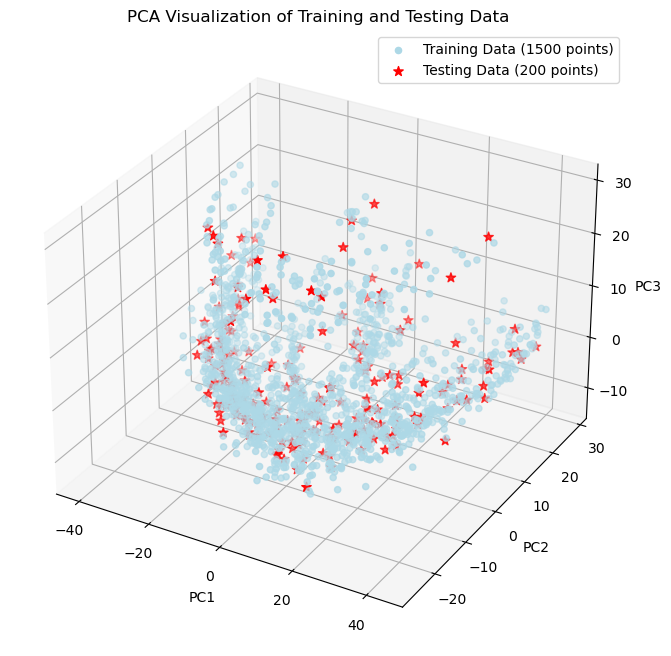

In [46]:
# Step 1: Standardize the features
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(X_test)

# Step 2: Apply PCA
pca = PCA(n_components = 3)
pca_train_data = pca.fit_transform(scaled_train_data)
pca_test_data = pca.transform(scaled_test_data)

# Step 3: Visualize the datasets in 3-D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Plotting training data
train_size = pca_train_data.shape[0]
ax.scatter(pca_train_data[:, 0], pca_train_data[:, 1], pca_train_data[:, 2], color = 'lightblue', label=f'Training Data ({train_size} points)', s=20)

# Plotting testing data
test_size = pca_test_data.shape[0]
ax.scatter(pca_test_data[:, 0], pca_test_data[:, 1], pca_test_data[:, 2], color='red', label=f'Testing Data ({test_size} points)', marker='*', s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Visualization of Training and Testing Data')
ax.legend()

plt.show()